In [1]:
#import libraries

import pandas as pd
import numpy as np
import plotly.figure_factory as ff
from scipy import stats

In [3]:
#data loading

from google.colab import files
uploaded = files.upload()

Saving control_group.csv to control_group.csv
Saving test_group.csv to test_group.csv


In [4]:
df_control = pd.read_csv('control_group.csv', sep=';')
df_experimental = pd.read_csv('test_group.csv', sep=';')

In [6]:
df_control_null_checked = df_control.isna().sum()
df_experimental_null_checked = df_experimental.isna().sum()

print(df_control_null_checked, df_experimental_null_checked )

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64 Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64


In [12]:
#Value Imputation for missing values

df_control['# of Impressions'] = df_control['# of Impressions'].fillna(round(df_control['# of Impressions'].mean(),1))
df_control['# of Website Clicks'] = df_control['# of Website Clicks'].fillna(round(df_control['# of Website Clicks'].mean(),1))
df_control['# of Searches'] = df_control['# of Searches'].fillna(round(df_control['# of Searches'].mean(),1))
df_control['# of View Content'] = df_control['# of View Content'].fillna(round(df_control['# of View Content'].mean(),1))
df_control['# of Add to Cart'] = df_control['# of Add to Cart'].fillna(round(df_control['# of Add to Cart'].mean(),1))
df_control['# of Purchase'] = df_control['# of Purchase'].fillna(round(df_control['# of Purchase'].mean(),1))
df_control['Reach'] = df_control['Reach'].fillna(round(df_control['Reach'].mean(),1))

df_control.isna().sum()

,0
Campaign Name,0
Date,0
Spend [USD],0
# of Impressions,0
Reach,0
# of Website Clicks,0
# of Searches,0
# of View Content,0
# of Add to Cart,0
# of Purchase,0


In [13]:
#merge two dataframe
df = pd.concat([df_control,df_experimental], axis=0)
df

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,91775.9,70868.6,5682.6,2321.8,1900.2,1087.2,522.0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [14]:
df.rename(columns=lambda x:x.strip().replace(' ','_'),inplace=True)
df

,Campaign_Name,Date,Spend_[USD],#_of_Impressions,Reach,#_of_Website_Clicks,#_of_Searches,#_of_View_Content,#_of_Add_to_Cart,#_of_Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,91775.9,70868.6,5682.6,2321.8,1900.2,1087.2,522.0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [15]:
df.dtypes

,0
Campaign_Name,object
Date,object
Spend_[USD],int64
#_of_Impressions,float64
Reach,float64
#_of_Website_Clicks,float64
#_of_Searches,float64
#_of_View_Content,float64
#_of_Add_to_Cart,float64
#_of_Purchase,float64


In [16]:
#convert float to int

df['#_of_Impressions'] = df['#_of_Impressions'].astype('int64')
df['Reach'] = df['Reach'].astype('int64')
df['#_of_Website_Clicks'] = df['#_of_Website_Clicks'].astype('int64')
df['#_of_Searches'] = df['#_of_Searches'].astype('int64')
df['#_of_View_Content'] = df['#_of_View_Content'].astype('int64')
df['#_of_Add_to_Cart'] = df['#_of_Add_to_Cart'].astype('int64')
df['#_of_Purchase'] = df['#_of_Purchase'].astype('int64')

df.dtypes

,0
Campaign_Name,object
Date,object
Spend_[USD],int64
#_of_Impressions,int64
Reach,int64
#_of_Website_Clicks,int64
#_of_Searches,int64
#_of_View_Content,int64
#_of_Add_to_Cart,int64
#_of_Purchase,int64


In [17]:
#Compares conversion rates for both campaign

Control_Campaign = df[df['Campaign_Name'] == 'Control Campaign']
Test_Campaign = df[df['Campaign_Name'] == 'Test Campaign']

Control_CV = Control_Campaign['#_of_Purchase'] / Control_Campaign['#_of_Website_Clicks']
Test_CV = Test_Campaign['#_of_Purchase'] / Test_Campaign['#_of_Website_Clicks']

AVG_Control_CV = Control_CV.mean()
AVG_Test_CV = Test_CV.mean()

print(AVG_Control_CV,AVG_Test_CV)

0.1140085998650422 0.09231181703283602


In [18]:
#Compares USD spent on both campaign

Average_Spend_Control = Control_Campaign['Spend_[USD]'].mean()
Average_Spend_Test = Test_Campaign['Spend_[USD]'].mean()

print(Average_Spend_Control,Average_Spend_Test)

2288.4333333333334 2563.0666666666666


AttributeError: 'Axes' object has no attribute 'show'

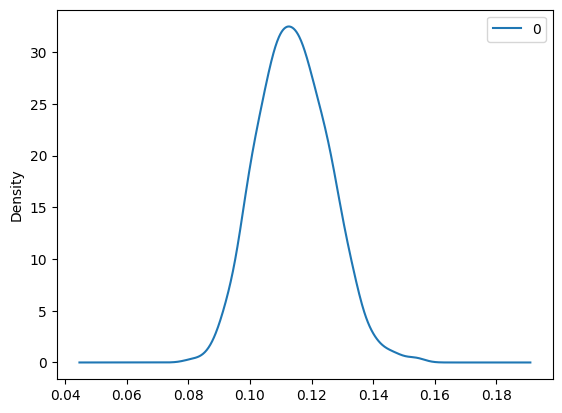

In [19]:
#Bootstrapping for Control Group

Boot_Control = []

for i in range (1000):
  Boot_Mean = Control_CV.sample(frac=1, replace=True).mean()
  Boot_Control.append(Boot_Mean)

Boot_Control = pd.DataFrame(Boot_Control)

fig = Boot_Control.plot(kind='density')
fig.show()

AttributeError: 'Axes' object has no attribute 'show'

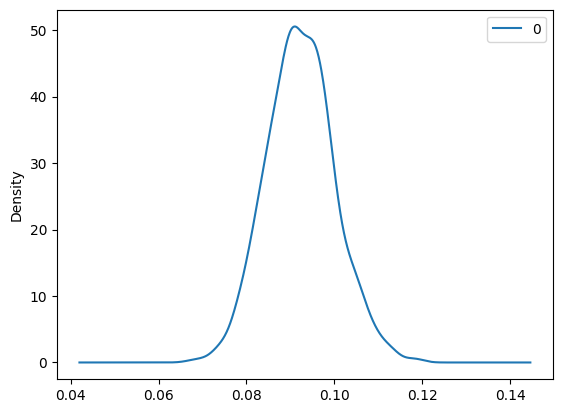

In [20]:
#Bootstrapping for Test Group

Boot_Test = []

for i in range (1000):
  Boot_Mean = Test_CV.sample(frac=1, replace=True).mean()
  Boot_Test.append(Boot_Mean)

Boot_Test = pd.DataFrame(Boot_Test)

fig = Boot_Test.plot(kind='density')
fig.show()

In [22]:
#Z-test

Boot_Test_Mean = Boot_Test.mean()
Boot_Control_Mean = Boot_Control.mean()
Boot_Test_Std = Boot_Test.std()
Boot_Control_Std = Boot_Control.std()

Pooled_Std = np.sqrt((Boot_Test_Std**2 + Boot_Control_Std**2)/2)
z_score = (Boot_Test_Mean - Boot_Control_Mean)/Pooled_Std
p_value = 1-stats.norm.cdf(z_score)

print(z_score,p_value)

0   -2.228314
dtype: float64 [0.9870702]


In [24]:
#T-Test

t_stat, p_value = stats.ttest_ind(Boot_Test, Boot_Control, alternative='greater', equal_var=False)

print(t_stat)
print(p_value)

[-49.82661173]
[1.]
